In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [18]:
# импортируем данные
df = pd.read_csv('spotify-recommendation.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [19]:
sdf = df[["speechiness", "danceability", "liked"]]
sdf.head()

,speechiness,danceability,liked
0,0.0477,0.803,0
1,0.3060,0.762,1
2,0.0419,0.261,0
3,0.0585,0.722,1
4,0.2220,0.787,1


In [20]:
X, y = sdf[["speechiness", "danceability"]].values, sdf["liked"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
print(sdf.head())
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

   speechiness  danceability  liked
0       0.0477         0.803      0
1       0.3060         0.762      1
2       0.0419         0.261      0
3       0.0585         0.722      1
4       0.2220         0.787      1
(195, 2) (195,)
(117, 2) (117,)
(78, 2) (78,)


In [22]:
# применяем Наивный Байесовский классификатор
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Число 'неверно' понравившихся песен из %d песен: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(y_pred)

Число 'неверно' понравившихся песен из 78 песен: 18
[0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 0 1 0]


Text(0, 0.5, 'danceability')

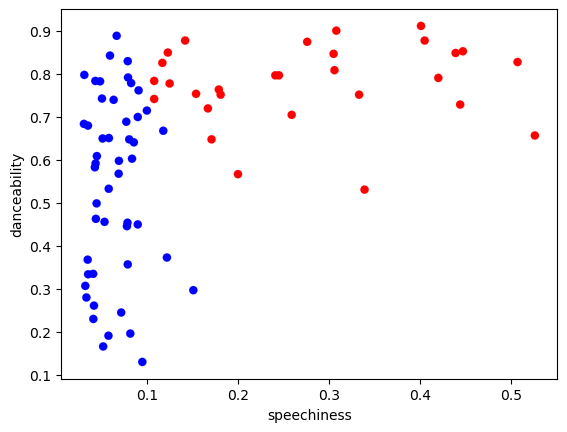

In [23]:
# визуализируем результат классификации тестовой выборки
plt.figure()
c = ['blue' if l == 0 else 'red' for l in y_pred]
plt.scatter(X_test[:, 0], X_test[:, 1], color=c, linewidth=0.1)
plt.xlabel("speechiness")
plt.ylabel("danceability")

In [24]:
# формируем кросс-валидационную таблицу
data = { 'y_Actual': y_test, 'y_Predicted': y_pred}
df_data = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
cross_table = pd.crosstab(df_data['y_Actual'], df_data['y_Predicted'],
                          rownames=['Actual'], colnames=['Predicted'], margins=True)
cross_table

Predicted,0,1,All
Actual,,,
0,35,4,39
1,14,25,39
All,49,29,78


In [25]:
pd.DataFrame(X_test).head()

,0,1
0,0.0355,0.334
1,0.1230,0.850
2,0.0900,0.700
3,0.0790,0.830
4,0.3330,0.752


In [28]:
# задаем новые точки для прогнозирования
n = np.array([[0.0355, 0.34],
              [0.1230, 0.85],
              [0.09, 0.85],
              [0.079, 0.75]])

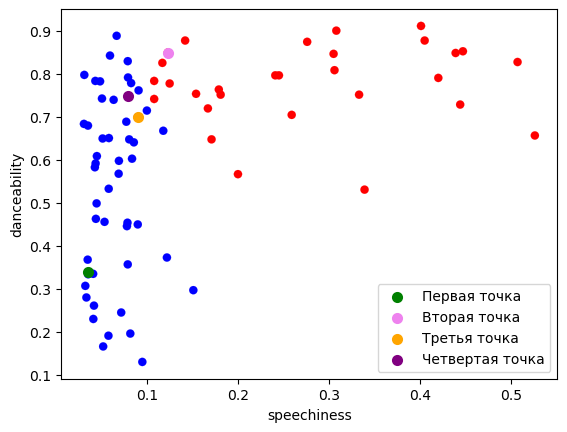

In [29]:
# визуализируем новые точки для прогнозирования
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], color=c, linewidth=0.1)
plt.scatter(n[0,0], n[0,1], color='green', label='Первая точка', linewidths=2)
plt.scatter(n[1,0], n[1,1], color='violet', label='Вторая точка', linewidths=2)
plt.scatter(n[2,0], n[2,1], color='orange', label='Третья точка', linewidths=2)
plt.scatter(n[3,0], n[3,1], color='purple', label='Четвертая точка', linewidths=2)
plt.xlabel("speechiness")
plt.ylabel("danceability")
plt.legend()
plt.show()

In [30]:
# делаем прогноз для новых точек
new_points = gnb.fit(X_train, y_train).predict(n)
new_points

array([0, 1, 0, 0])